In [1]:
import thecypher as cy
import urllib.request as urllib2
from bs4 import BeautifulSoup
import pandas as pd
import re
from unidecode import unidecode
import re
from urllib.request import urlopen
import requests
import time
import lyricsgenius
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import numpy
import csv
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import logging
from sklearn.decomposition import PCA
from tqdm import tqdm

In [2]:
# $ pip install wordcloud

In [3]:
from wordcloud import WordCloud, STOPWORDS 
comment_words= ""
stopwords = set(STOPWORDS) 
df = pd.read_csv("data.csv")

## Top 10 Most Frequent Words for All Genres

In [4]:
wordlist = []

for val in tqdm(df.lyrics):
    tokens = val.split() 
    wordlist.append(tokens)
wordlist = sum(wordlist, [])
wordfreq = []
for w in tqdm(wordlist):
    wordfreq.append(wordlist.count(w))
list_of_tuples_3 = list(zip(wordlist, wordfreq))
df3 = pd.DataFrame(list_of_tuples_3, columns = ['Word', 'Frequency'])
df3 = df3.sort_values(by=['Frequency'])[::-1]
df3 = df3.drop_duplicates(subset=['Word'])
df3 = df3.head(10)
print(df3)


 41%|████████████████████████████████████████████████████████████████▎                                                                                           | 134004/325090 [14:00<19:58, 159.39it/s]


KeyboardInterrupt: 

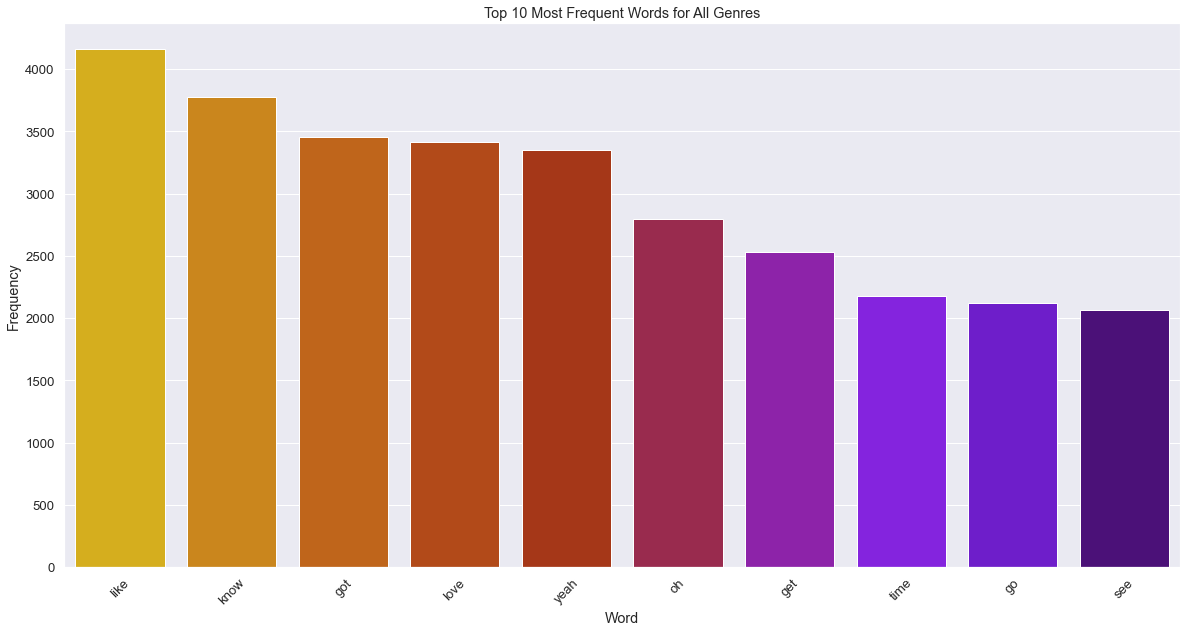

In [50]:
ax3 = sns.barplot(x = df3.Word, y = df3.Frequency, palette=("gnuplot_r"))
change_width(ax2, .55)
plt.rcParams['figure.figsize'] = [20, 10]
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.rcParams.update({'font.size': 22})
plt.title("Top 10 Most Frequent Words for All Genres")
plt.xticks(rotation=45)
sns.set_context("poster")
plt.savefig('Top10.pdf',pad_inches=1)
fig.savefig('out.pdf')
plt.show()

In [51]:
df.head()

,Unnamed: 0,artist,song,lyrics,genre,lyric_count,lyric_count_norm
0,0,Katy Perry,The One That Got Away acoustic,summer high school first would makeout mustang...,pop,89,7.489217
1,1,Katy Perry,Who Am I Living For,yeah yeah yeah feel phoenix inside march alone...,pop,80,6.438694
2,2,Katy Perry,Daisies,told dreams started laughin guess mind actuall...,pop,63,5.320394
3,3,Katy Perry,Witness,lost today would stay could love enough stimul...,pop,89,7.895872
4,4,Katy Perry,Starstrukk,nice legs daisy dukes makes go way like lowcut...,pop,73,5.794824


## Project our lyrics into dimensional vectors


**This is a short a quick demo of Google Universal Sentence Encoder. The environment should be good on this one. <br>Don't forget to install tensorFlow first!**

In [5]:
## $ pip install tensorflow

## $ pip install --upgrade tensorflow-hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
# Import the Universal Sentence Encoder's TF Hub module, might take a while to download
embed = hub.load(module_url)

2020-11-30 17:59:32,783 : INFO : Using C:\Users\josha\AppData\Local\Temp\tfhub_modules to cache modules.


In [6]:
def getEmbed(_string,USE = embed):
    
    """Function takes a string argument and returns its high dimensional vector from USE"""
    
    return np.array(USE([_string])[0])

example = getEmbed('Hello how are you?')
# print(example)


In [7]:
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding: [0.008344482630491257, 0.00048085578600876033, 0.06595247238874435, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.05080859735608101, -0.016524294391274452, 0.01573782041668892, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.028332680463790894, -0.05586216226220131, -0.01294142659753561, ...]



In [8]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)



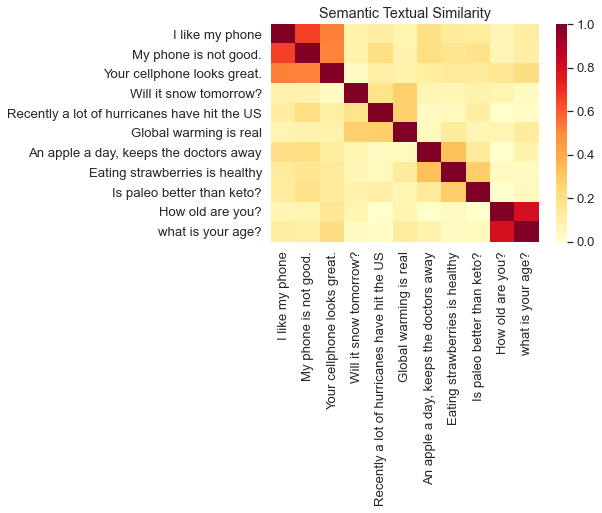

In [9]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)

In [10]:
for i in range(len(df)):
    df.lyrics[i] = getEmbed(df.lyrics[i]).tolist()

c:\users\josha\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df.to_csv('lyrics2vec.csv')

In [12]:
df_vec = pd.read_csv("lyrics2vec.csv")

In [13]:
# print(type(df_vec))
# print(type(df))
print(df_vec.head(10))

   Unnamed: 0  Unnamed: 0.1      artist                            song  \
0           0             0  Katy Perry  The One That Got Away acoustic   
1           1             1  Katy Perry             Who Am I Living For   
2           2             2  Katy Perry                         Daisies   
3           3             3  Katy Perry                         Witness   
4           4             4  Katy Perry                      Starstrukk   
5           5             5  Katy Perry                        Birthday   
6           6             6  Katy Perry                   Save As Draft   
7           7             7  Katy Perry                  Walking on Air   
8           8             8  Katy Perry                        Firework   
9           9             9  Katy Perry                 Unconditionally   

                                              lyrics genre  lyric_count  \
0  [-0.03462914377450943, -0.06796256452798843, 0...   pop           89   
1  [-0.06140784546732902

In [14]:
df_embed = pd.DataFrame([df.lyrics[i] for i in range(df.shape[0])],\
                        index=[df.genre[i] for i in range(df.shape[0])])

print(df_embed.head(10))

          0         1         2         3         4         5         6    \
pop -0.034629 -0.067963  0.069235 -0.042588 -0.065489  0.029289  0.044530   
pop -0.061408 -0.069197  0.061201  0.050199 -0.019850 -0.033546  0.068392   
pop -0.039916 -0.044595  0.013519 -0.058858 -0.032305 -0.052050  0.037210   
pop -0.001811 -0.000001  0.024851  0.030089 -0.024987 -0.062170 -0.010401   
pop -0.001963 -0.039135 -0.011527  0.025387 -0.006315  0.007541 -0.002482   
pop -0.059922 -0.061264  0.062284  0.059680 -0.052203 -0.047218 -0.061848   
pop -0.007013 -0.072376 -0.066359  0.038720 -0.054151 -0.046476  0.040780   
pop  0.004870 -0.055279  0.061035  0.007988 -0.012775 -0.052248 -0.006155   
pop  0.007114 -0.059523  0.058985  0.050068 -0.036469 -0.058044  0.019202   
pop -0.021379 -0.063510  0.029503  0.061463 -0.036552 -0.008131  0.037790   

          7         8         9    ...       502       503       504  \
pop -0.021600 -0.025340 -0.063887  ...  0.001767 -0.068704  0.042984   
pop -0.0

In [15]:
def musixmatch_PCA(df_embedding,n_components):
    
    
    cols = df_embedding.index
    
    embeddings = df_embedding.iloc[:, 1:] #subset on embeddings only
    
    pca = PCA(n_components=n_components) #instantiate PCA

    pca.fit(embeddings) #fit the embeddings

    new_values = pca.transform(embeddings) #transform / reduce data
    

    print(pca.explained_variance_ratio_.cumsum()) 
    df_reduced = pd.DataFrame(new_values,index=cols) #get new DataFrame
    
    
    #merges PCA DataFrame on original DataFrame
    df_merge = pd.DataFrame(df_reduced,\
                        index=[df.genre[i] for i in range(df.shape[0])])
    
    return df_merge 

In [33]:
df_afterPCA = musixmatch_PCA(df_embed,n_components=50)

# print(df_afterPCA.head(10))

embeddings = df_embed.iloc[:, 1:] #subset on embeddings only
    
pca = PCA(n_components=50) #instantiate PCA

pca.fit(embeddings) #fit the embeddings

new_values = pca.transform(embeddings) #transform / reduce data
    
#     #let's see how much variance can be explained
print("explained variance ratio")
print(pca.explained_variance_ratio_.cumsum())


print(df_afterPCA)

labels = list(df_afterPCA.index) # get the list of genres

print(labels[:20]) # first 20 labels
print(labels[len(labels)-21:len(labels)-1]) # last 20 labels
print(len(labels))

[0.06653627 0.11628376 0.14930762 0.17361546 0.19647707 0.21705005
 0.23343825 0.24789814 0.26156534 0.27450186 0.28699799 0.29880439
 0.31010065 0.32042183 0.33070297 0.3408746  0.35063254 0.35999434
 0.3689798  0.37780956 0.38633038 0.39461885 0.40276457 0.41079933
 0.41847096 0.42608755 0.43338776 0.44061054 0.44779532 0.45483875
 0.46178523 0.46859056 0.47524803 0.48177046 0.48802811 0.49424453
 0.500393   0.50648729 0.51243599 0.51826357 0.52401379 0.52972479
 0.53532809 0.54071732 0.54606647 0.55131528 0.55655281 0.56171391
 0.56673873 0.571688  ]
explained variance ratio
[0.06653627 0.11628376 0.14930762 0.17361546 0.19647707 0.21705005
 0.23343825 0.24789814 0.26156534 0.27450186 0.28699799 0.29880439
 0.31010065 0.32042186 0.330703   0.34087465 0.35063261 0.35999432
 0.36897988 0.37780954 0.38633046 0.39461869 0.40276449 0.41079958
 0.41847168 0.42608752 0.43339048 0.44061504 0.44779865 0.45484382
 0.46178939 0.46859516 0.47525525 0.4817817  0.48803845 0.49426076
 0.50040214 0